In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
weather_data = pd.read_csv('data/df/all_df.csv')

In [3]:
weather_data

,Dates,Date,yy,mm,dd,hh,nn,insolation,out_tmperature,out_humidity,...,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,heat_supply
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021-11-26 00:03:00,2021-11-26,2021,11,26,0,3,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021-11-26 00:04:00,2021-11-26,2021,11,26,0,4,-2.8,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152635,2022-03-20 23:55:00,2022-03-20,2022,3,20,23,55,-3.0,6.2,61,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152636,2022-03-20 23:56:00,2022-03-20,2022,3,20,23,56,-3.2,6.2,61,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152637,2022-03-20 23:57:00,2022-03-20,2022,3,20,23,57,-3.2,6.1,61,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN
152638,2022-03-20 23:58:00,2022-03-20,2022,3,20,23,58,-3.3,6.1,61,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,NaN


In [4]:
weather_data.ceiling.info()

<class 'pandas.core.series.Series'>
RangeIndex: 152640 entries, 0 to 152639
Series name: ceiling
Non-Null Count   Dtype  
--------------   -----  
152114 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [5]:
weather_data_dropna = weather_data.dropna(axis=0)

In [7]:
weather_data_dropna

,Dates,Date,yy,mm,dd,hh,nn,insolation,out_tmperature,out_humidity,...,shield_tmperature_h,shield_energy_h,shield_energy_v,exhaust_fan,ceiling,floating_fan,fan_coil_b_site,ventilation_temperature_control,heating_temperature_set_up,heat_supply
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021-11-26 00:03:00,2021-11-26,2021,11,26,0,3,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021-11-26 00:04:00,2021-11-26,2021,11,26,0,4,-2.8,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132475,2022-02-28 23:55:00,2022-02-28,2022,2,28,23,55,-2.7,4.1,51,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
132476,2022-02-28 23:56:00,2022-02-28,2022,2,28,23,56,-2.7,4.1,52,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
132477,2022-02-28 23:57:00,2022-02-28,2022,2,28,23,57,-2.7,4.1,52,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
132478,2022-02-28 23:58:00,2022-02-28,2022,2,28,23,58,-2.6,4.1,52,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8


In [8]:
weather_data_dropna.columns

Index(['Dates', 'Date', 'yy', 'mm', 'dd', 'hh', 'nn', 'insolation',
       'out_tmperature', 'out_humidity', 'wind_speed', 'wind_direction',
       'in_tmperature', 'in_humidity', 'shield_light_h', 'shield_tmperature_h',
       'shield_energy_h', 'shield_energy_v', 'exhaust_fan', 'ceiling',
       'floating_fan', 'fan_coil_b_site', 'ventilation_temperature_control',
       'heating_temperature_set_up', 'heat_supply'],
      dtype='object')

In [10]:
X = weather_data_dropna.iloc[:,7:-1].values
y=weather_data_dropna['heat_supply'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.3, random_state=10)


In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
r_square = lr.score(X_test, y_test)
print('R-square',r_square)
print('\n')
print('x변수의 기울기 : ',lr.coef_)
print('\n')
print('절편 : ', lr.intercept_)
print('\n')

R-square 0.2758167474181896


x변수의 기울기 :  [ 1.92799619e-06  7.09410173e-03 -1.46946562e-04  2.23066052e-03
  4.44459140e-05 -3.97114843e-02 -4.40703518e-03  4.94497252e-04
  5.40306229e-04 -2.84466859e-05 -1.30290124e-03  4.50206714e-02
 -2.60629454e-04  1.25325682e-02  2.12077782e-01  2.49549797e-02
  1.24360120e-02]


절편 :  0.34957818348201114




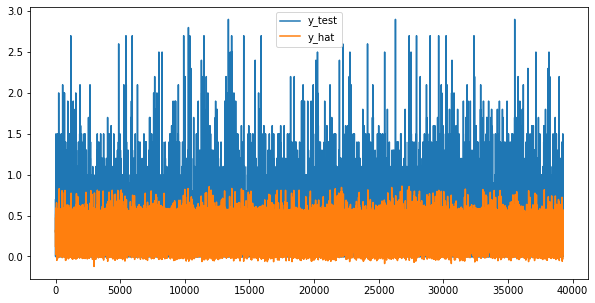

In [13]:
y_hat = lr.predict(X_test)
plt.figure(figsize = (10,5))
plt.plot(y_test, label='y_test')
plt.plot(y_hat, label='y_hat')
plt.legend(loc='upper center')
plt.show()

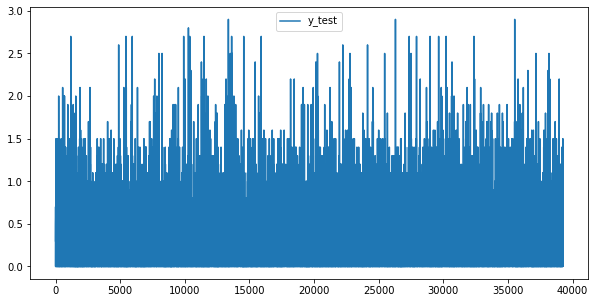

In [14]:
y_hat = lr.predict(X_test)
plt.figure(figsize = (10,5))
plt.plot(y_test, label='y_test')
plt.legend(loc='upper center')
plt.show()

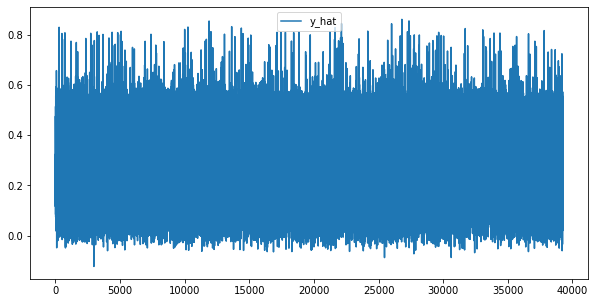

In [15]:
y_hat = lr.predict(X_test)
plt.figure(figsize = (10,5))
plt.plot(y_hat, label='y_hat')
plt.legend(loc='upper center')
plt.show()

sklearn으로 만든 결과 좀 이상한 거 같아서 다른 패키지 이용해서 한번 더 확인

In [16]:
import pandas as pd
import statsmodels.formula.api as sm